## Introduction to Machine Learning with Titanic Dataset
### 1. What is Machine Learning 
- Computers being able to perform task with being explicitly programed.

### 2. Types of Machine Learning 
1. Supervised
2. Unsupervised
3. Reinforcement Learning
![image](img/typesOflearnign.png)

### 3. Problems we can solve using Machine Learning
![image](img/problemofml.png)
![image](img/rlscenario.png)


In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

## about libraries 

### 1.Pandas 
- Pandas takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called data frame that looks very similar to table in a statistical software like Excel
- https://pandas.pydata.org/docs/getting_started/index.html

### 2. Matplotlib and Seaborn
- Seaborn and Matplotlib are two of Python's most powerful visualization libraries. Seaborn uses fewer syntax and has stunning default themes and Matplotlib is more easily customizable through accessing the classes
- https://seaborn.pydata.org/
- https://matplotlib.org/

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.drop('Cabin',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)

In [8]:
for col in df.columns:
    print(col,len(df[col].unique()))

PassengerId 891
Survived 2
Pclass 3
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Embarked 4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.describe(include="O")

,Sex,Ticket,Embarked
count,891,891,889
unique,2,681,3
top,male,CA. 2343,S
freq,577,7,644


In [12]:
num_cols = df._get_numeric_data().columns
obj_cols = df.select_dtypes('object').columns

In [13]:
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [14]:
obj_cols

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')

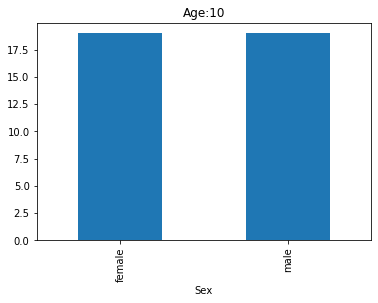

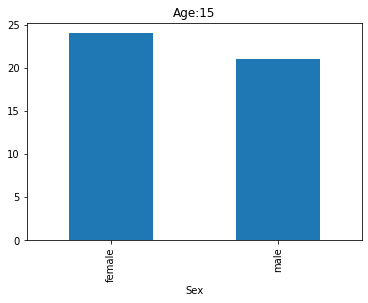

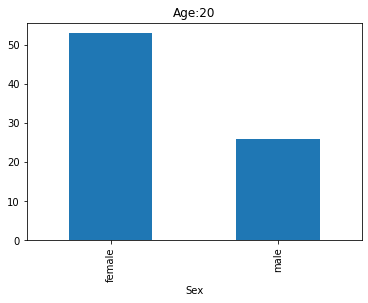

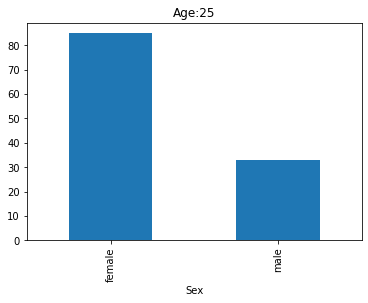

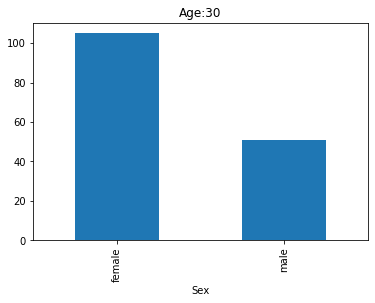

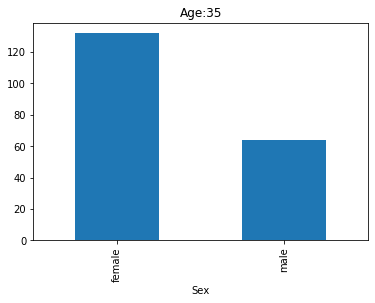

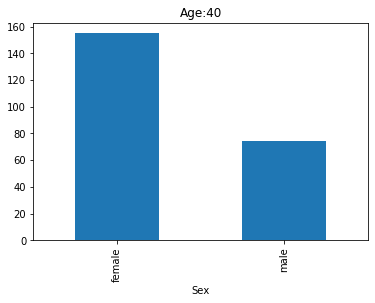

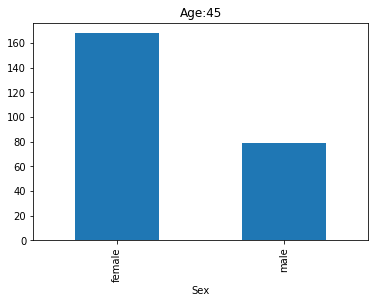

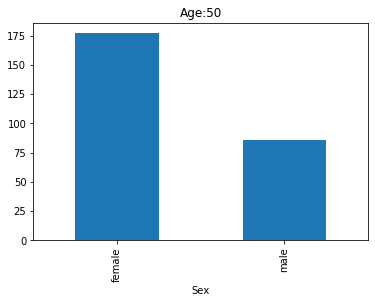

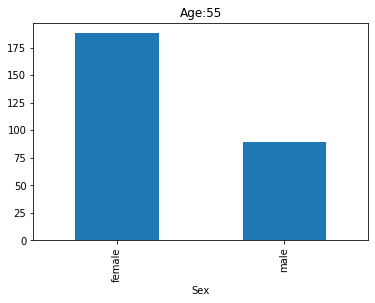

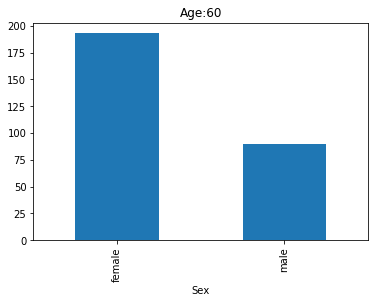

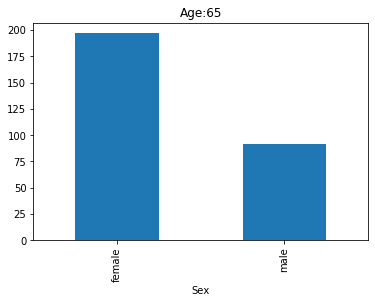

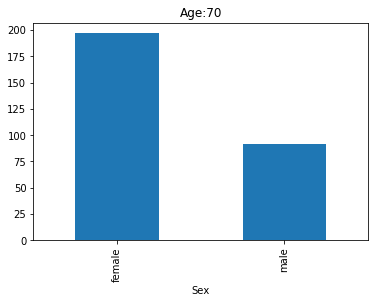

In [41]:
for x in range(10,75,5):
    df[(df['Survived']==1)&(df['Age']<x)].groupby(['Sex']).count()['Survived'].plot(kind='bar',title ="Age:"+str(x))
    plt.pause(0.2)

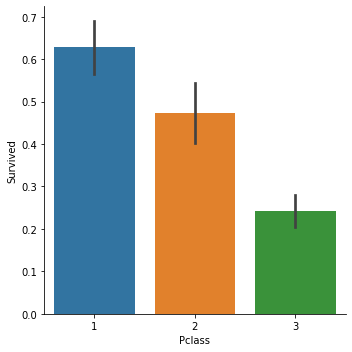

In [45]:
sns.catplot(x="Pclass", y="Survived", kind="bar", data=df)

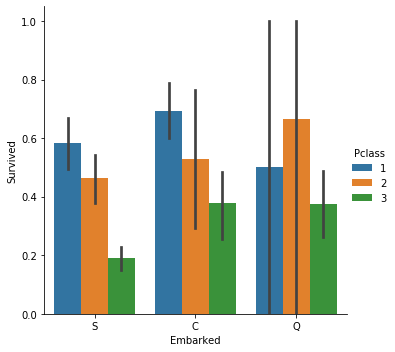

In [17]:
sns.catplot(x="Embarked", y="Survived", hue="Pclass", kind="bar", data=df)

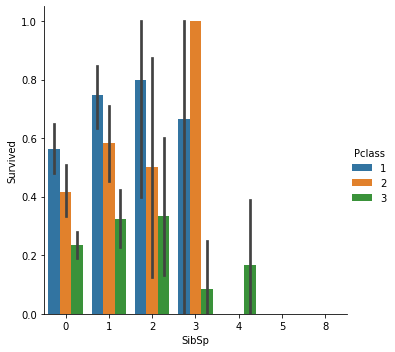

In [18]:
sns.catplot(x="SibSp", y="Survived", hue="Pclass", kind="bar", data=df)

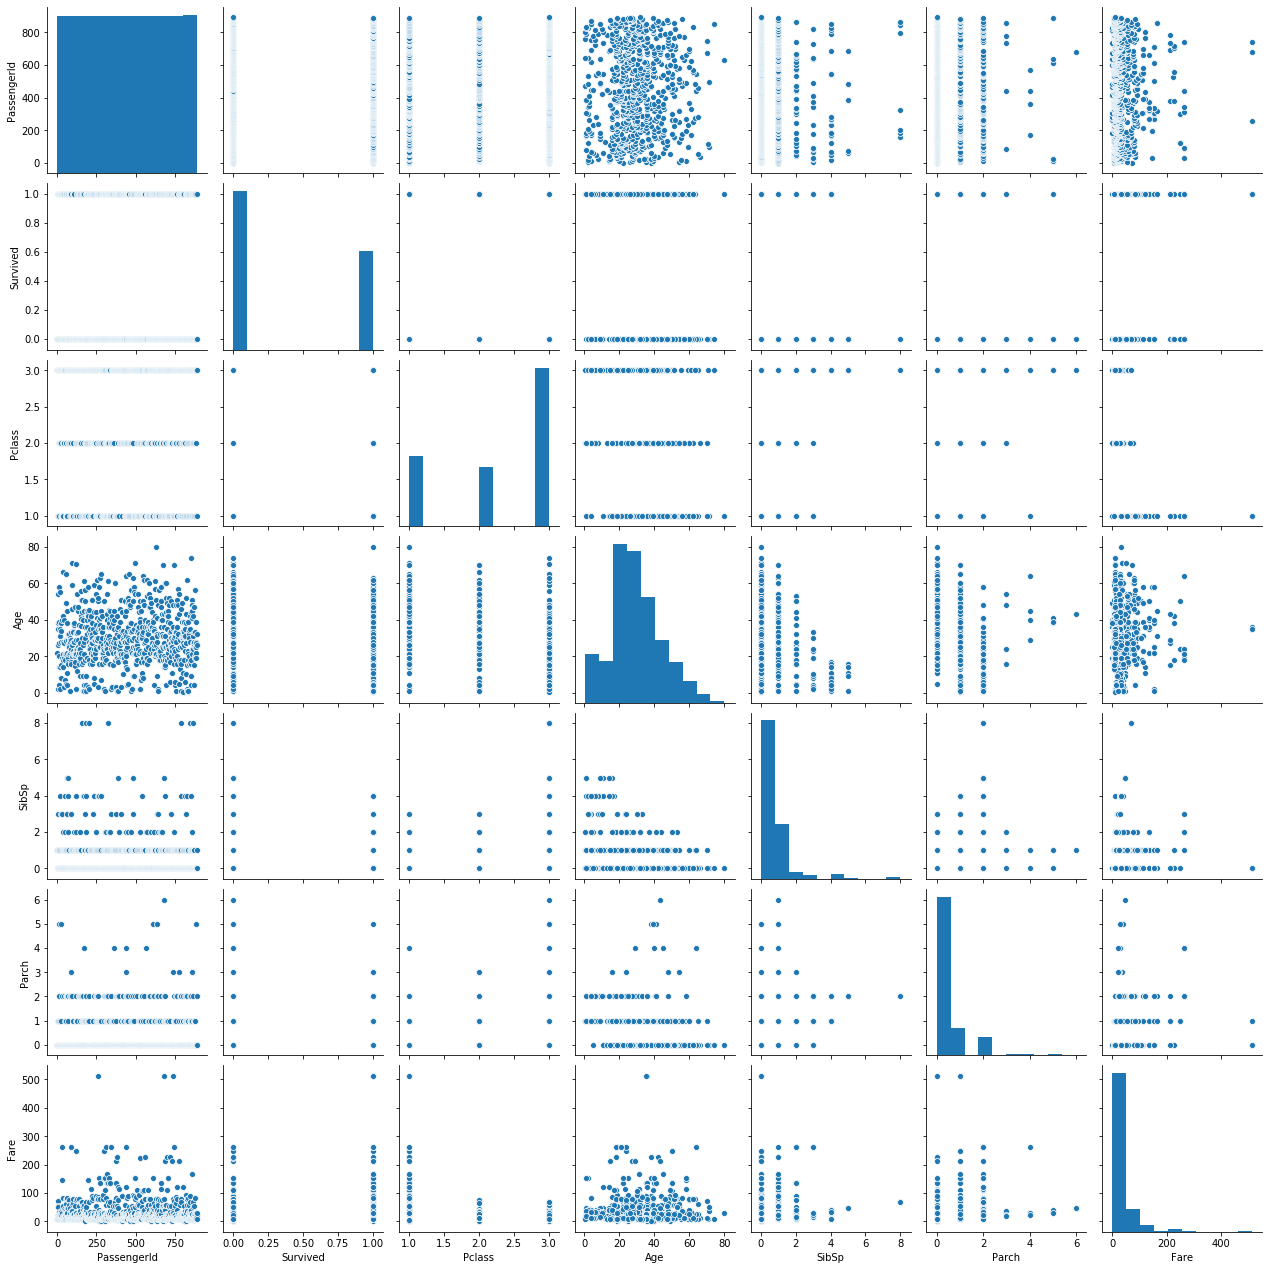

In [19]:
sns.pairplot(df)

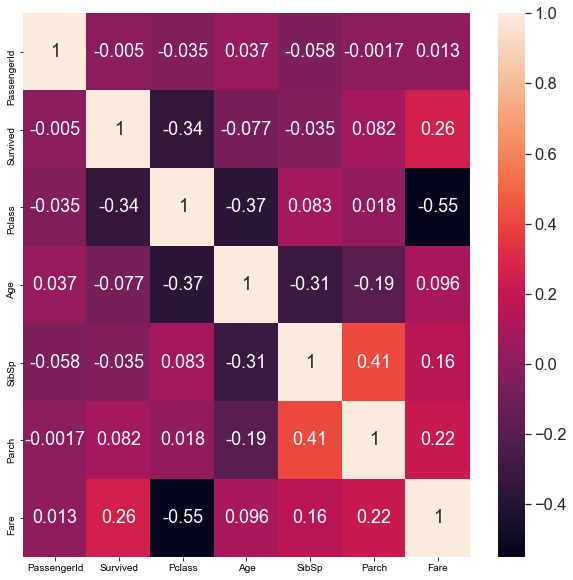

In [20]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.set(font_scale=1.5) 
sns.heatmap(df.corr(), annot=True,ax=ax)

### Data Cleaning

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [22]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [23]:
df['Embarked'].dtype

dtype('O')

### mode() returns an array 
- get mode()[0] first element of mode


In [24]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

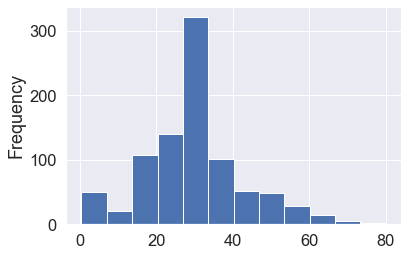

In [25]:
df['Age'].plot.hist(bins=12, alpha=1)

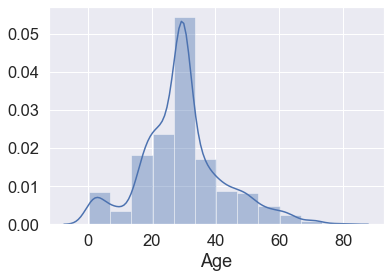

In [26]:
sns.distplot(df['Age'],bins=12)

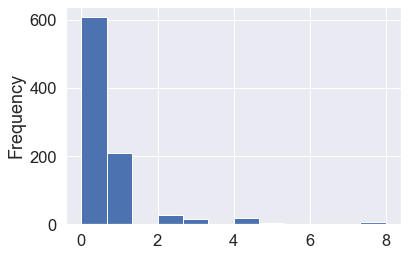

In [27]:
df['SibSp'].plot.hist(bins=12, alpha=1)

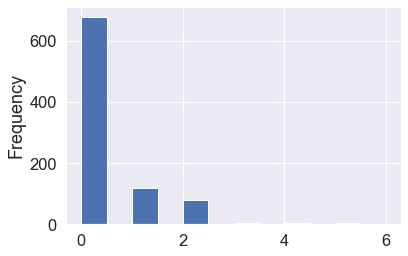

In [28]:
df['Parch'].plot.hist(bins=12, alpha=1)

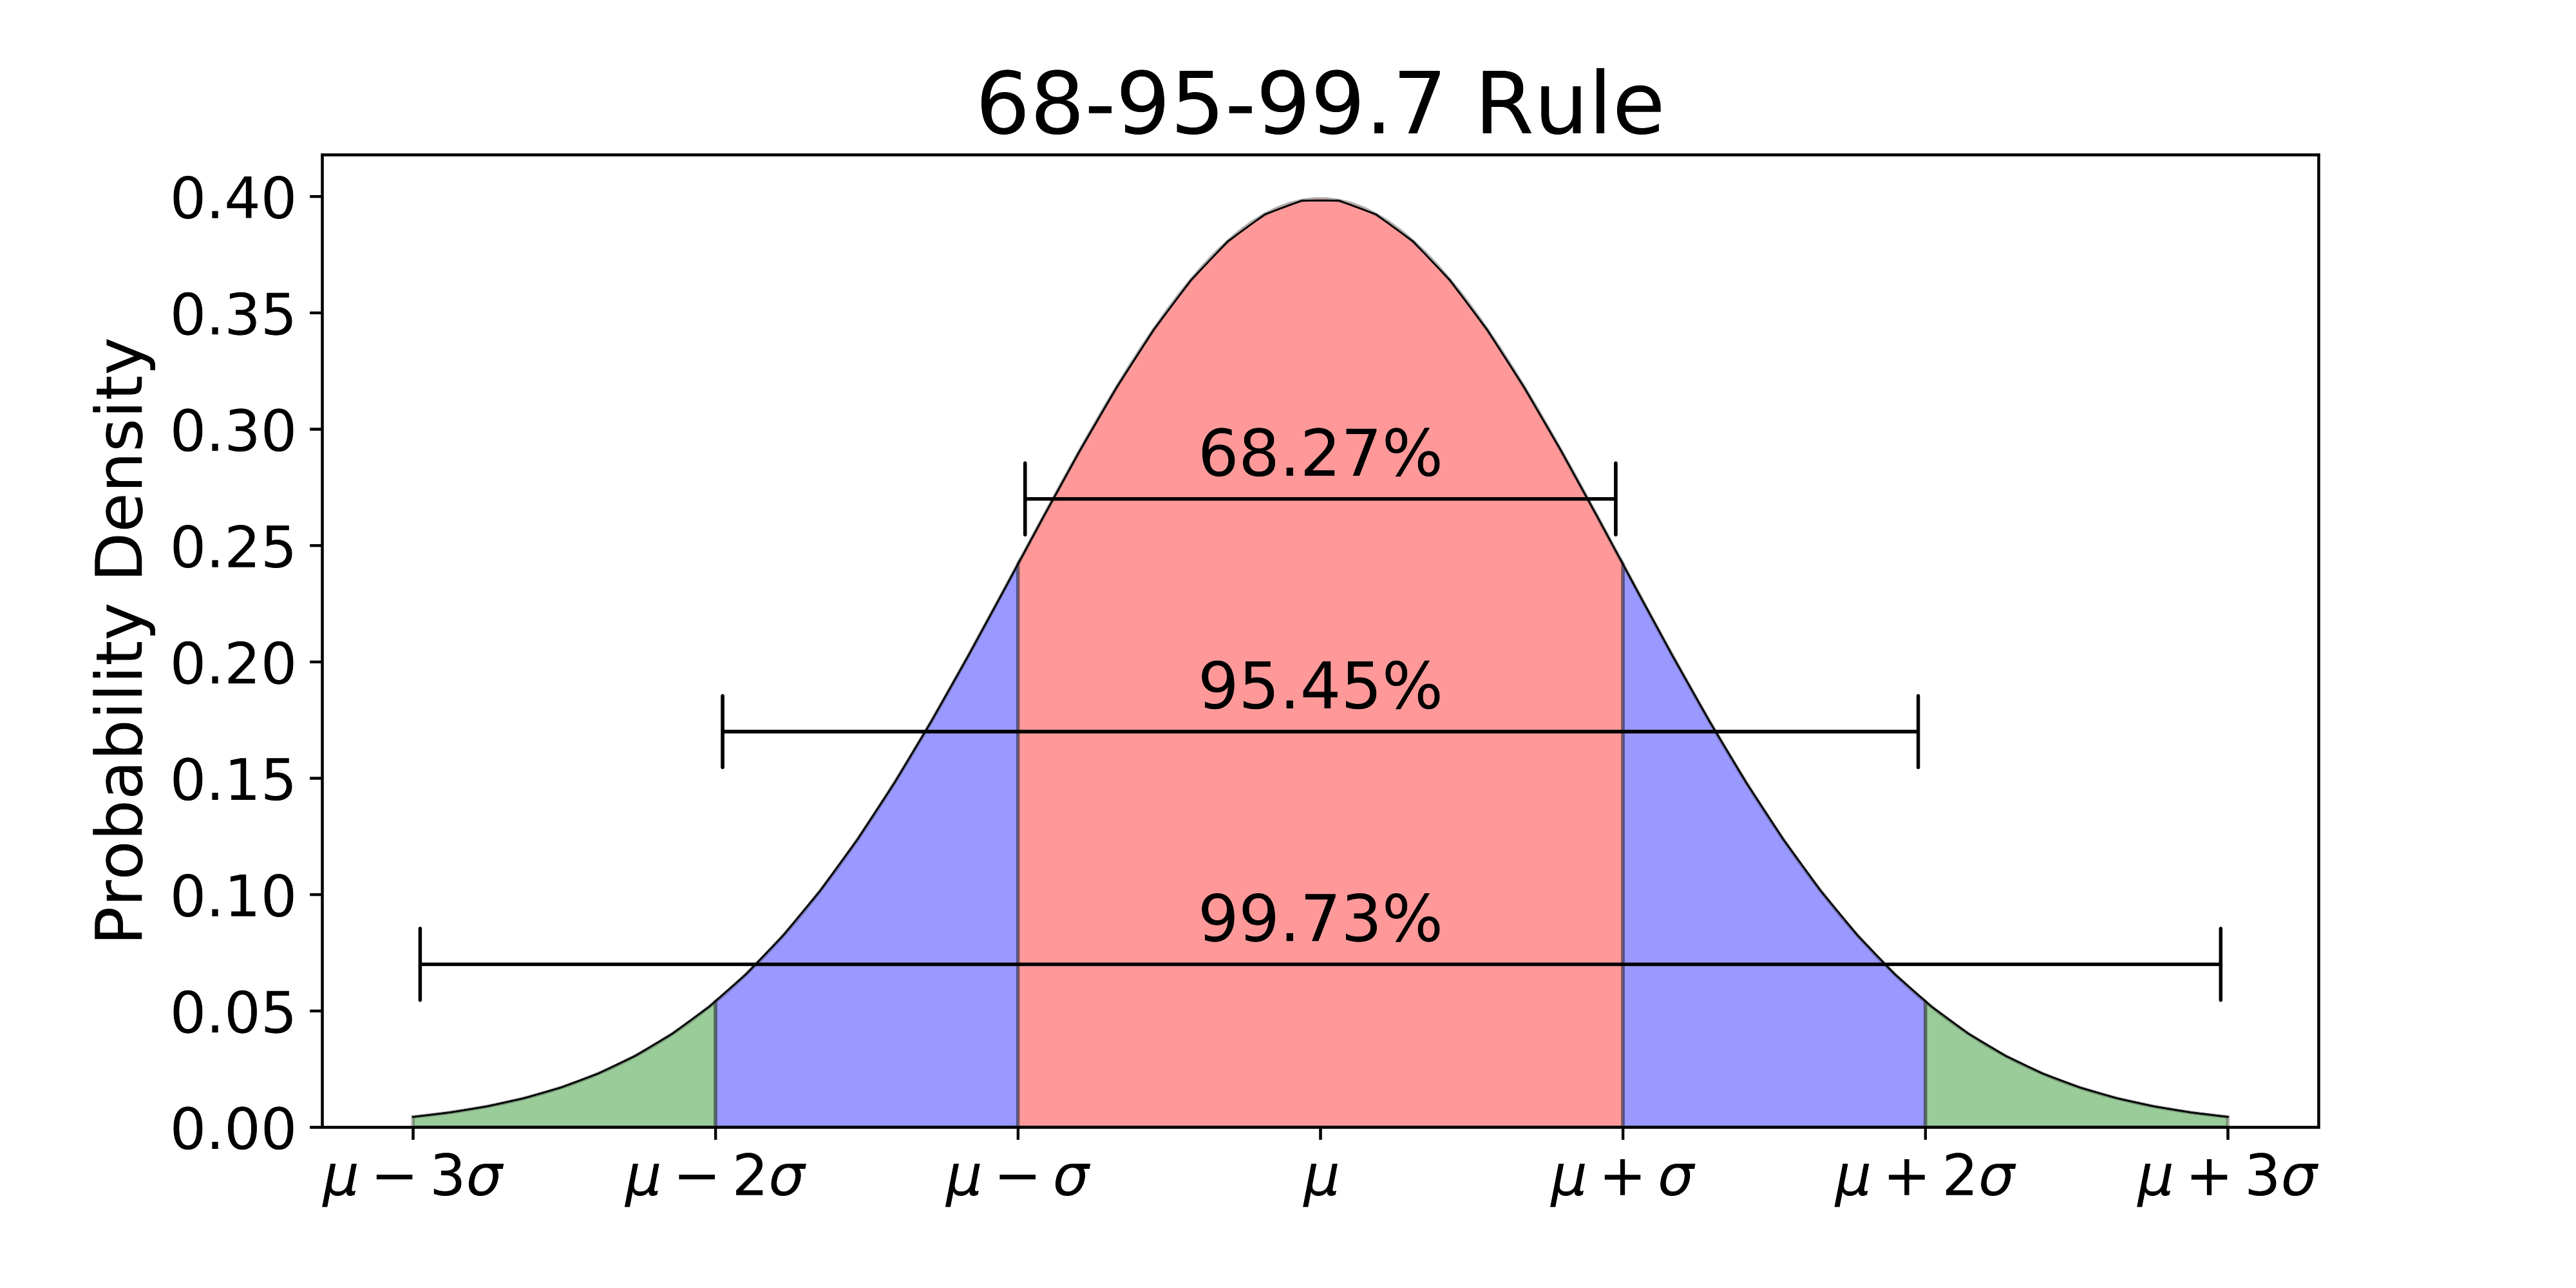

In [29]:
Image("img/distribution.png")

In [30]:
print(df.Age.mean())
print(df.Age.median())
print(df.Age.mode()[0])

29.699117647058763
29.69911764705882
29.69911764705882


In [31]:
for i in num_cols:
    print(i,'mean',df[i].mean())
    print(i,'median',df[i].median())
    print(i,'mode',df[i].mode()[0])

PassengerId mean 446.0
PassengerId median 446.0
PassengerId mode 1
Survived mean 0.3838383838383838
Survived median 0.0
Survived mode 0
Pclass mean 2.308641975308642
Pclass median 3.0
Pclass mode 3
Age mean 29.699117647058763
Age median 29.69911764705882
Age mode 29.69911764705882
SibSp mean 0.5230078563411896
SibSp median 0.0
SibSp mode 0
Parch mean 0.38159371492704824
Parch median 0.0
Parch mode 0
Fare mean 32.2042079685746
Fare median 14.4542
Fare mode 8.05


In [32]:
df['zscore_age']=((df.Age-df.Age.mean())/df.Age.std())
df.drop(df[(df.zscore_age>3)|(df.zscore_age<-3)].index,axis=0,inplace=True)

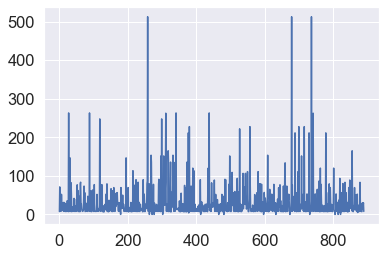

In [33]:
df.Fare.plot()

In [34]:
threshold_max = df['Fare'].quantile(0.99)
threshold_max

250.0460139999994

In [35]:
threshold_min = df['Fare'].quantile(0.05)
threshold_min

7.225

In [36]:
 df2 = df[(df['Fare']<threshold_max)&(df['Fare']>threshold_min)]

In [37]:
df2.shape

(820, 11)

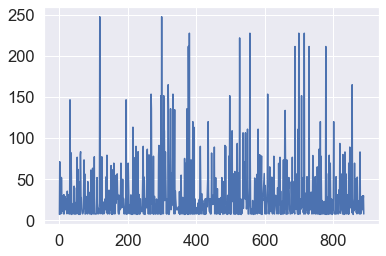

In [38]:
df2.Fare.plot()

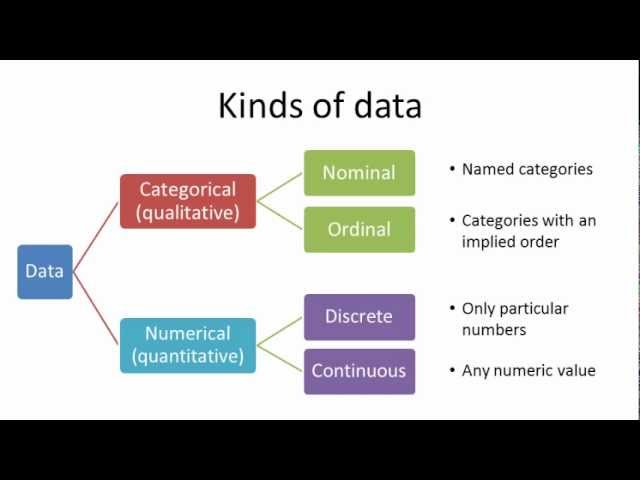

In [39]:
Image("img/kinds_data.jpg")

In [40]:
def binary_encoder(data):
    if data == 'female':
        return 0
    else :
        return 1

In [41]:
df2['Sex']=df2['Sex'].apply(binary_encoder)

In [42]:
df2['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 820, dtype: int64

In [43]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df2['Ticket'] = encoder.fit_transform(df2['Ticket'])


In [44]:
df2['Ticket']

0      483
1      552
2      610
3       45
4      434
      ... 
886     95
887     12
888    616
889      8
890    428
Name: Ticket, Length: 820, dtype: int32

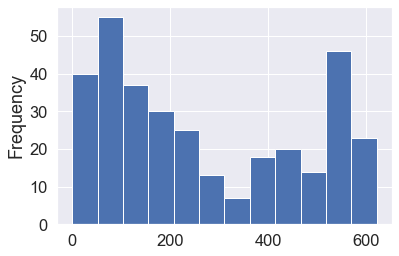

In [45]:
df2[df2['Survived']==True]['Ticket'].plot.hist(bins=12, alpha=1)

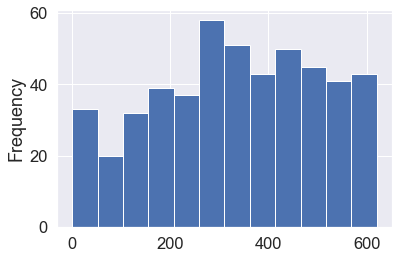

In [46]:
df2[df2['Survived']==False]['Ticket'].plot.hist(bins=12, alpha=1)

In [47]:
pass_id = df2['PassengerId']
X = df2[['Age','Fare','Sex','Ticket','Embarked','SibSp','Parch']]
y = df2['Survived']

In [48]:
X

,Age,Fare,Sex,Ticket,Embarked,SibSp,Parch
0,22.000000,7.2500,1,483,S,1,0
1,38.000000,71.2833,0,552,C,1,0
2,26.000000,7.9250,0,610,S,0,0
3,35.000000,53.1000,0,45,S,1,0
4,35.000000,8.0500,1,434,S,0,0
...,...,...,...,...,...,...,...
886,27.000000,13.0000,1,95,S,0,0
887,19.000000,30.0000,0,12,S,0,0
888,29.699118,23.4500,0,616,S,1,2
889,26.000000,30.0000,1,8,C,0,0


In [49]:
dummies = pd.get_dummies(df2['Embarked'])

In [50]:
dummies

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [51]:
X.drop('Embarked',axis=1,inplace=True)

In [52]:
cols = dummies.columns

In [53]:
X[cols]=dummies

In [54]:
X

,Age,Fare,Sex,Ticket,SibSp,Parch,C,Q,S
0,22.000000,7.2500,1,483,1,0,0,0,1
1,38.000000,71.2833,0,552,1,0,1,0,0
2,26.000000,7.9250,0,610,0,0,0,0,1
3,35.000000,53.1000,0,45,1,0,0,0,1
4,35.000000,8.0500,1,434,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,1,95,0,0,0,0,1
887,19.000000,30.0000,0,12,0,0,0,0,1
888,29.699118,23.4500,0,616,1,2,0,0,1
889,26.000000,30.0000,1,8,0,0,1,0,0


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2048)

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
X_train.shape[0] == y_train.shape[0]

True

In [87]:
def apply_model(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)   
    print('Unscaled data result')
    print(accuracy_score(y_test,predictions))
    scaler = StandardScaler()
    X_train[cols] = scaler.fit(X_train[cols].values).transform(X_train[cols].values)
    X_test[cols]  =  scaler.fit(X_test[cols].values).transform(X_test[cols].values)
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)   
    print('Scaled data result')
    print(accuracy_score(y_test,predictions))


In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
clf = LogisticRegression(max_iter=200)
apply_model(clf,X_train,X_test,y_train,y_test)

Unscaled data result
0.8170731707317073
Scaled data result
0.8170731707317073


In [90]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=1024,n_estimators=150)
apply_model(gb_clf,X_train,X_test,y_train,y_test)

Unscaled data result
0.8170731707317073
Scaled data result
0.8170731707317073


In [91]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=150)
apply_model(ada_clf,X_train,X_test,y_train,y_test)

Unscaled data result
0.823170731707317
Scaled data result
0.823170731707317


In [123]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=SVC(),n_estimators=50, random_state=0)
apply_model(bag_clf,X_train,X_test,y_train,y_test)

Unscaled data result
0.6158536585365854
Scaled data result
0.6158536585365854


In [131]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
apply_model(tree_clf,X_train,X_test,y_train,y_test)

Unscaled data result
0.7560975609756098
Scaled data result
0.7560975609756098


In [137]:
Image(tree_clf.tree_)

FileNotFoundError: No such file or directory: '<sklearn.tree._tree.Tree object at 0x0000022D47773180>'

FileNotFoundError: No such file or directory: '<sklearn.tree._tree.Tree object at 0x0000022D47773180>'

<IPython.core.display.Image object>

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)

apply_model(rf_clf,X_train,X_test,y_train,y_test)

Unscaled data result
0.8170731707317073
Scaled data result
0.8109756097560976


In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=30)
apply_model(knn_clf,X_train,X_test,y_train,y_test)

Unscaled data result
0.6219512195121951
Scaled data result
0.6219512195121951


In [67]:
from sklearn.ensemble import VotingClassifier
e_clf = VotingClassifier(estimators=[('logis', clf), ('gb_clfgb_clf', gb_clf), ('rf_clf', rf_clf),('ada_clf',ada_clf),('knn_clf',knn_clf)], voting='hard')
apply_model(e_clf,X_train,X_test,y_train,y_test)

Unscaled data result
0.8292682926829268
Scaled data result
0.8353658536585366


In [68]:
test = pd.read_csv("test.csv")

In [69]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [70]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [71]:
pass_id = test['PassengerId']
X_test = test[['Age','Fare','Sex','Ticket','Embarked','SibSp','Parch']]
X_test['Ticket'] =encoder.fit_transform(X_test['Ticket'])


In [72]:
X_test.Fare.fillna(X.Fare.mean(),inplace=True)

In [73]:
X_test.Age.fillna(X.Age.mean(),inplace=True)

In [74]:
X_test.isnull().sum()

Age         0
Fare        0
Sex         0
Ticket      0
Embarked    0
SibSp       0
Parch       0
dtype: int64

In [75]:
X_test['Sex'] = X_test['Sex'].apply(binary_encoder)
X_test.head()

,Age,Fare,Sex,Ticket,Embarked,SibSp,Parch
0,34.5,7.8292,1,152,Q,0,0
1,47.0,7.0000,0,221,S,1,0
2,62.0,9.6875,1,73,Q,0,0
3,27.0,8.6625,1,147,S,0,0
4,22.0,12.2875,0,138,S,1,1


In [76]:
dummies = pd.get_dummies(df['Embarked'])
X_test.drop('Embarked',axis=1,inplace=True)
X_test[dummies.columns]=dummies

In [77]:
X_test.fillna(0,inplace=True)

In [78]:
X_test

,Age,Fare,Sex,Ticket,SibSp,Parch,C,Q,S
0,34.50000,7.8292,1,152,0,0,0.0,0.0,1.0
1,47.00000,7.0000,0,221,1,0,1.0,0.0,0.0
2,62.00000,9.6875,1,73,0,0,0.0,0.0,1.0
3,27.00000,8.6625,1,147,0,0,0.0,0.0,1.0
4,22.00000,12.2875,0,138,1,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,29.26406,8.0500,1,267,0,0,0.0,0.0,1.0
414,39.00000,108.9000,0,324,0,0,0.0,0.0,1.0
415,38.50000,7.2500,1,346,0,0,0.0,0.0,1.0
416,29.26406,8.0500,1,220,0,0,0.0,0.0,1.0


In [79]:
prediction = e_clf.predict(X_test)

In [80]:
len(prediction)==len(pass_id)

True

In [81]:
results = pd.DataFrame()
results['PassengerId']=pass_id.values
results['Survived']=prediction
results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [82]:
results.to_csv('results.csv',index=None)